In [1]:
# script to get and plot TTS for rf06 with varying bl conditions
# date created: 2/17/2020
# author: sofia chelpon

In [2]:
############################ PREP WORKSPACE ############################

In [23]:
import numpy as np 
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline
%config inlinebackend.figure_format='retina'

# import my TTS module, need to add path to folder
import sys
sys.path.insert(1, '/Volumes/scdrive2/TTS_2020/base_tts_code/')
import tts_mod

In [24]:
# read in ratios dataframe
path = "./contrast_ratios_varybl.pkl"
contrast_ratios = pd.read_pickle(path)

In [25]:
# sort 
ratios_sort = contrast_ratios.sort_values(['TROPO_tau'])
ratios_sort.head()

,Instrument,Trace_Gas,BL_tau,TROPO_tau,UT_tau,full_BL,south_BL
40,TOGA,Acetaldehyde,0.289063,0.365920,0.376967,0.097199,0.091193
8,AWAS,C2H6S_Dimethyl_sulfide,0.955122,1.689426,3.279163,0.020591,0.026594
5,AWAS,C5H12_nPentane,1.214449,2.312606,4.723079,0.192745,0.845048
39,AWAS,C4H9NO3_n_Butyl_nitrate,2.262138,3.428733,4.736003,0.110161,0.160658
41,TOGA,n_Butane,1.959376,3.813463,8.057685,0.187672,0.376722


In [26]:
############################ GET TTS OUTPUTS FOR EA. CASE ############################
tau_tropo = ratios_sort['TROPO_tau'].values
t, exp_decay_matrix, LT = tts_mod.prep_for_tts(tau_tropo)

In [27]:
# --------------- ver 1: full bl 
utbl_full = ratios_sort['full_BL'].values

my_mustar_full, my_r2_full, my_gf_full, my_t_full, mean_age_full, \
    mode_age_full, best_k_full = tts_mod.get_tts(utbl_full, tau_tropo, t, \
                                     exp_decay_matrix, LT)

In [28]:
# --------------- ver 1: south bl 
utbl_south = ratios_sort['south_BL'].values

my_mustar_south, my_r2_south, my_gf_south, my_t_south, mean_age_south, \
    mode_age_south, best_k_south = tts_mod.get_tts(utbl_south, tau_tropo, t, \
                                     exp_decay_matrix, LT)

In [ ]:
# --------------- ver 1: north bl 
#utbl_north = ratios_sort['north_BL'].values

#my_mustar_north, my_r2_north, my_gf_north, my_t_north, mean_age_north, \
#    mode_age_north, best_k_north = tts_mod.get_tts(utbl_north, tau_tropo, t, \
#                                     exp_decay_matrix, LT)

In [30]:
import imp
imp.reload(tts_mod)

<module 'tts_mod' from '/Volumes/scdrive2/TTS_2020/base_tts_code/tts_mod.py'>

In [31]:
############################ PLOT TTS OUTPUTS FOR EA. CASE ############################

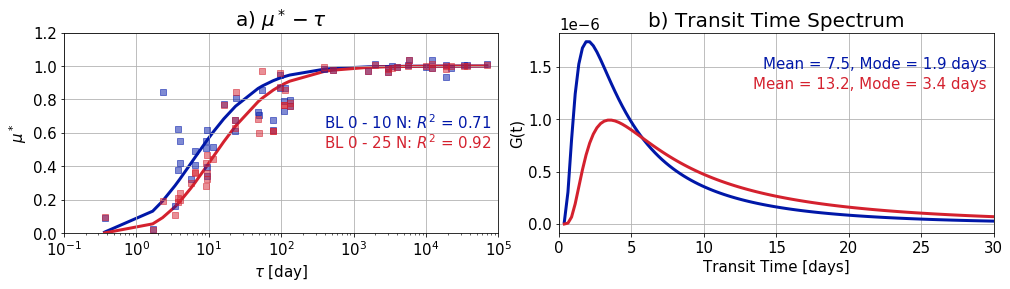

In [33]:
# --------------- start plot with campaign avg bl
title_str = 'BL 0 - 10 N: '

my_color = [0, 0.09, 0.66] #pantone blue
overplot = 0
add_scatter = 1
add_r2 = 1 
add_meanmode = 1
# first plot only, dummies (will get real after first run creates fig)
width = 0
height = 0
my_ax = 0

fig, my_ax, width, height = tts_mod.plot_tts(tau_tropo, my_mustar_south, utbl_south, my_r2_south,  
                                        my_gf_south, my_t_south, mean_age_south, mode_age_south, 
                                        my_color, overplot, add_scatter, add_r2, 
                                        add_meanmode, my_ax, width, height, title_str)


# --------------- add rf08 bl case
title_str = 'BL 0 - 25 N: '
my_color = [0.83, 0.13, 0.18] # amranth red 
overplot = 1
add_scatter = 1
add_r2 = 1 
add_meanmode = 1


tts_mod.plot_tts(tau_tropo, my_mustar_full, utbl_full, my_r2_full, 
                                        my_gf_full, my_t_full, mean_age_full, mode_age_full, 
                                        my_color, overplot, add_scatter, add_r2, 
                                        add_meanmode, my_ax, width, height, title_str)

my_ax[0].grid(which = 'major')    
my_ax[1].grid(which = 'major')            

# --------------- save figure 
fig.savefig('./tts_vary_bl_latitude.pdf')  
#fig.savefig(svpath + 'tts_vary_bl_rf06.svg')  

0.041666666666666664

In [67]:
#############################################################################
#############################################################################
#############################################################################

# test removing some long lifetime species 
# --------------- ver 1: south bl 
ratios_sort2 = ratios_sort.drop(index=9).drop(index=17).drop(index=15).drop(index=18) \
    .drop(index=29).drop(index=25).drop(index=51).drop(index=10).drop(index=11) \
    .drop(index=13).drop(index=19).drop(index=16).drop(index=12).drop(index=50) \
    .drop(index=23).drop(index=22).drop(index=31)

ratios_sort2

,Instrument,Trace_Gas,BL_tau,TROPO_tau,UT_tau,full_BL,north_BL,south_BL
40,TOGA,Acetaldehyde,0.289063,0.365920,0.376967,0.097950,0.104906,0.091405
8,AWAS,C2H6S_Dimethyl_sulfide,0.955122,1.689426,3.279163,0.020389,0.017183,0.026865
5,AWAS,C5H12_nPentane,1.214449,2.312606,4.723079,0.192052,0.119746,0.858713
39,AWAS,C4H9NO3_n_Butyl_nitrate,2.262138,3.428733,4.736003,0.110464,0.087445,0.163995
41,TOGA,n_Butane,1.959376,3.813463,8.057685,0.186318,0.124191,0.376282
4,AWAS,C4H10_nButane,1.959376,3.813463,8.057685,0.203894,0.132008,0.627858
42,TOGA,i_Butane,2.175570,4.031311,7.903592,0.236806,0.165621,0.418202
3,AWAS,C4H10_Isobutane,2.175570,4.031311,7.903592,0.194183,0.127189,0.559830
38,AWAS,C4H9NO3_2_Butyl_nitrate,3.990874,5.629249,6.861378,0.298913,0.276883,0.330464
6,AWAS,C6H6_Benzene,3.755136,6.447323,11.947207,0.362374,0.295387,0.491730


In [65]:
utbl_south2 = ratios_sort2['south_BL'].values
tau_tropo2 = ratios_sort2['TROPO_tau'].values
t2, exp_decay_matrix2, LT2 = tts_mod.prep_for_tts(tau_tropo2)

my_mustar_south2, my_r2_south2, my_gf_south2, my_t_south2, mean_age_south2, \
    mode_age_south2, best_k_south2 = tts_mod.get_tts(utbl_south2, tau_tropo2, t2, \
                                     exp_decay_matrix2, LT2)

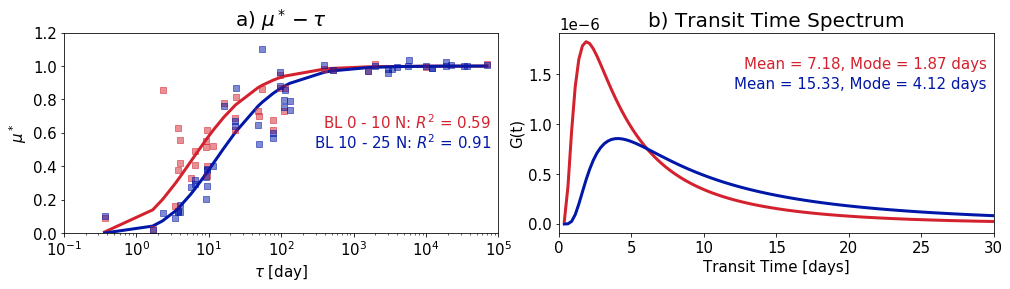

In [66]:
# --------------- start plot with campaign avg bl
title_str = 'BL 0 - 10 N: '

my_color = [0.83, 0.13, 0.18] # amranth red 
overplot = 0
add_scatter = 1
add_r2 = 1 
add_meanmode = 1
# first plot only, dummies (will get real after first run creates fig)
width = 0
height = 0
my_ax = 0

fig, my_ax, width, height = tts_mod.plot_tts(tau_tropo2, my_mustar_south2, utbl_south2, 
                                             my_r2_south2, my_gf_south2, my_t_south2, 
                                             mean_age_south2, mode_age_south2, my_color, 
                                             overplot, add_scatter, add_r2, 
                                             add_meanmode, my_ax, width, height, title_str)

# campaign average
title_str = 'BL 10 - 25 N: '
my_color = [0, 0.09, 0.66] #pantone blue
overplot = 1
add_scatter = 1
add_r2 = 1 
add_meanmode = 1 

tts_mod.plot_tts(tau_tropo, my_mustar_north, utbl_north, my_r2_north,  
                                        my_gf_north, my_t_north, mean_age_north, mode_age_north, 
                                        my_color, overplot, add_scatter, add_r2, 
                                        add_meanmode, my_ax, width, height, title_str)
